# Load data

In [1]:
img_path = "../data/test/ms-dhoni-run-out-in-2019-wc-semi-finals.jpg"
seg_path = "../data/test/ms-dhoni-run-out-in-2019-wc-semi-finals.seg.txt"
bbx_path = "../data/test/ms-dhoni-run-out-in-2019-wc-semi-finals.bbx.txt"

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

import sys, os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

from src.data.visualize import drawSegments, drawRects
from src.data.io import readAnnotationsFile

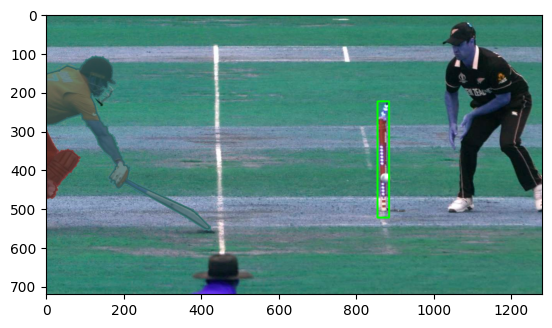

In [3]:
img = cv.imread(img_path)
seg_lst = readAnnotationsFile(seg_path, True)
wicket_bbx_lst = readAnnotationsFile(bbx_path, True)

drawn_img = drawSegments(img, seg_lst, color_overlay_ratio=0.7, line_width_scale=0.005)
drawn_img = drawRects(drawn_img, wicket_bbx_lst, line_width_scale=0.005)
plt.imshow(drawn_img)
plt.show()

# Extract focus region

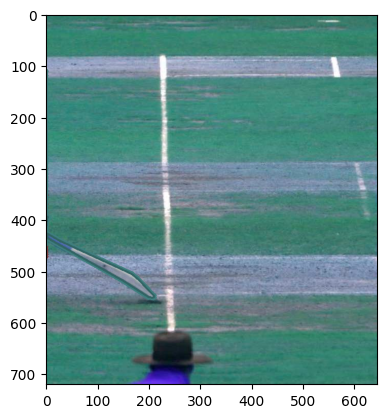

In [4]:
from src.data.process import extractFocusRegion
focus_region, batsmen_segments_focused = extractFocusRegion(img, seg_lst, wicket_bbx_lst)
focus_region_drawn = drawSegments(focus_region, batsmen_segments_focused)
plt.imshow(focus_region_drawn)
plt.show()

# Find crease

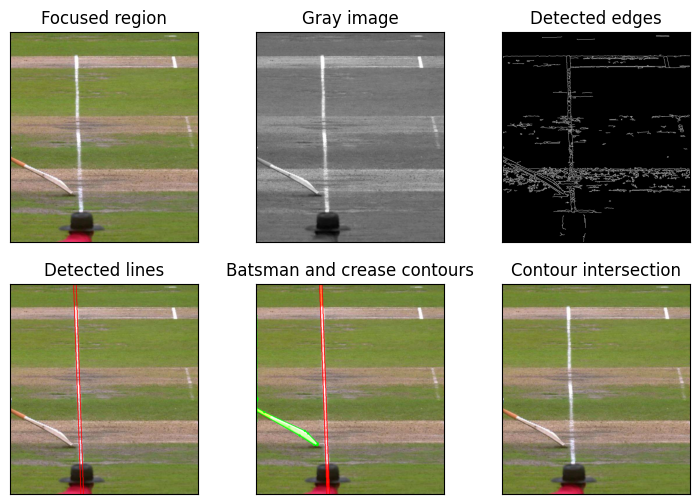

False

In [5]:
import numpy as np
from src.data.visualize import findCreasePass

passed = findCreasePass(focus_region, batsmen_segments_focused, True)
passed